# Statistical Distributions for Customer Data Generation
## A Visual Guide to Choosing the Right Distribution

This notebook provides a comprehensive introduction to statistical distributions commonly used in customer data generation. We'll explore each distribution with visual examples, real-world applications, and practical code implementations.

### Why Statistical Distributions Matter:
- **Realism**: Choose distributions that match real-world data patterns
- **Control**: Understand parameters to generate desired characteristics
- **Validation**: Statistical properties can be tested and verified
- **Efficiency**: Mathematical models generate data faster than complex ML approaches

In [1]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("📊 Libraries loaded successfully!")
print("🎯 Ready to explore statistical distributions for customer data!")

📊 Libraries loaded successfully!
🎯 Ready to explore statistical distributions for customer data!


## Distribution Overview Table

Here's our mapping of customer attributes to statistical distributions:

| Column | Distribution | Rationale | Key Properties |
|--------|-------------|----------|----------------|
| **age** | Normal (truncated) | Age follows normal distribution in most populations | Bell-shaped, bounded by realistic age limits |
| **income** | Log-Normal | Income is typically right-skewed | Right-skewed, few high earners, many moderate earners |
| **credit_score** | Beta (scaled) | Bounded between 300-850, often bi-modal | Bounded, flexible shape, can model score distributions |
| **account_balance** | Exponential | Many small balances, few large ones | Heavy right tail, decreasing probability |
| **num_transactions** | Poisson | Count data, discrete events | Discrete, models event counts per time period |
| **days_since_last_purchase** | Gamma | Positive, right-skewed waiting times | Positive only, flexible shape for waiting times |
| **satisfaction_score** | Beta | Bounded between 0-10, often skewed | Bounded, can model ratings and percentages |
| **loyalty_years** | Weibull | Customer lifetime, hazard function | Models survival/duration, realistic for customer lifetime |
| **monthly_spend** | Gamma | Positive, moderately skewed | Positive only, flexible for spending patterns |
| **website_visits** | Negative Binomial | Over-dispersed count data | Counts with variance > mean, more realistic than Poisson |

---
# 1. Normal Distribution (Truncated)
## Perfect for: Customer Age

### Theory:
The **Normal (Gaussian) distribution** is the most famous distribution in statistics. For customer age, we use a **truncated normal** to ensure realistic age bounds (e.g., 18-80 years).

### Mathematical Properties:
- **Shape**: Symmetric bell curve
- **Parameters**: μ (mean), σ (standard deviation)
- **Range**: -∞ to +∞ (truncated: bounded)
- **PDF**: f(x) = (1/σ√2π) × e^(-½((x-μ)/σ)²)

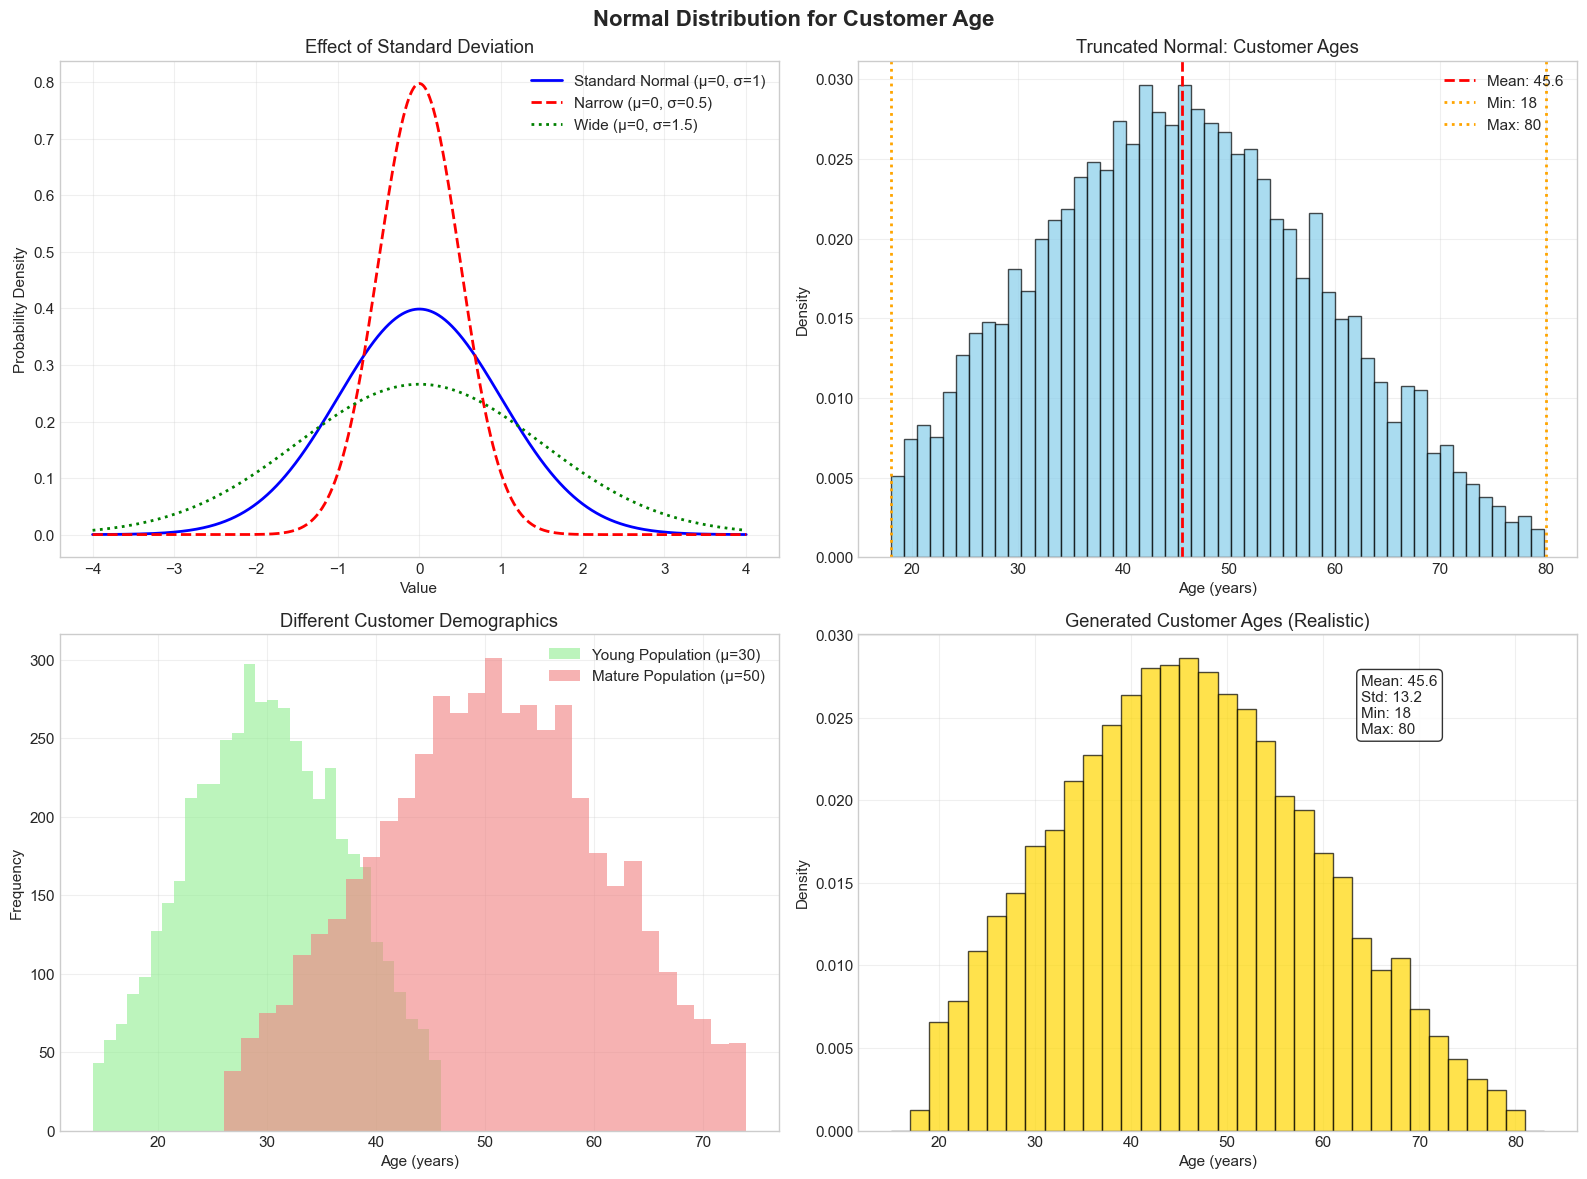

✅ Normal Distribution Characteristics:
   • Symmetric around mean (45 years)
   • 68% of customers between 30-60 years
   • Bounded between 18-80 years for realism
   • Generated 10,000 realistic customer ages


In [2]:
# Normal Distribution Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Normal Distribution for Customer Age', fontsize=16, fontweight='bold')

# 1. Standard Normal vs Custom Normal
x = np.linspace(-4, 4, 1000)
axes[0,0].plot(x, stats.norm.pdf(x, 0, 1), 'b-', label='Standard Normal (μ=0, σ=1)', linewidth=2)
axes[0,0].plot(x, stats.norm.pdf(x, 0, 0.5), 'r--', label='Narrow (μ=0, σ=0.5)', linewidth=2)
axes[0,0].plot(x, stats.norm.pdf(x, 0, 1.5), 'g:', label='Wide (μ=0, σ=1.5)', linewidth=2)
axes[0,0].set_title('Effect of Standard Deviation')
axes[0,0].set_xlabel('Value')
axes[0,0].set_ylabel('Probability Density')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Truncated Normal for Age
age_mean, age_std = 45, 15
lower_bound, upper_bound = 18, 80

# Generate truncated normal data
a, b = (lower_bound - age_mean) / age_std, (upper_bound - age_mean) / age_std
ages = stats.truncnorm.rvs(a, b, loc=age_mean, scale=age_std, size=10000)

axes[0,1].hist(ages, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,1].axvline(ages.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {ages.mean():.1f}')
axes[0,1].axvline(lower_bound, color='orange', linestyle=':', linewidth=2, label=f'Min: {lower_bound}')
axes[0,1].axvline(upper_bound, color='orange', linestyle=':', linewidth=2, label=f'Max: {upper_bound}')
axes[0,1].set_title('Truncated Normal: Customer Ages')
axes[0,1].set_xlabel('Age (years)')
axes[0,1].set_ylabel('Density')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Compare different age distributions
young_population = stats.truncnorm.rvs(-2, 2, loc=30, scale=8, size=5000)
mature_population = stats.truncnorm.rvs(-2, 2, loc=50, scale=12, size=5000)

axes[1,0].hist(young_population, bins=30, alpha=0.6, label='Young Population (μ=30)', color='lightgreen')
axes[1,0].hist(mature_population, bins=30, alpha=0.6, label='Mature Population (μ=50)', color='lightcoral')
axes[1,0].set_title('Different Customer Demographics')
axes[1,0].set_xlabel('Age (years)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Real-world application
# Generate realistic customer ages
customer_ages = np.round(ages).astype(int)
age_stats = pd.Series(customer_ages).describe()

axes[1,1].hist(customer_ages, bins=range(15, 85, 2), density=True, alpha=0.7, color='gold', edgecolor='black')
axes[1,1].set_title('Generated Customer Ages (Realistic)')
axes[1,1].set_xlabel('Age (years)')
axes[1,1].set_ylabel('Density')
axes[1,1].grid(True, alpha=0.3)

# Add statistics text
stats_text = f"Mean: {age_stats['mean']:.1f}\nStd: {age_stats['std']:.1f}\nMin: {age_stats['min']:.0f}\nMax: {age_stats['max']:.0f}"
axes[1,1].text(0.7, 0.8, stats_text, transform=axes[1,1].transAxes, 
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("✅ Normal Distribution Characteristics:")
print(f"   • Symmetric around mean ({age_mean} years)")
print(f"   • 68% of customers between {age_mean-age_std:.0f}-{age_mean+age_std:.0f} years")
print(f"   • Bounded between {lower_bound}-{upper_bound} years for realism")
print(f"   • Generated {len(customer_ages):,} realistic customer ages")

In [3]:
# Implementation Code for Normal Distribution
def generate_customer_ages(n_customers, mean_age=45, std_age=15, min_age=18, max_age=80):
    """
    Generate realistic customer ages using truncated normal distribution
    
    Parameters:
    - n_customers: number of ages to generate
    - mean_age: average age
    - std_age: standard deviation
    - min_age, max_age: bounds for realistic ages
    """
    a = (min_age - mean_age) / std_age
    b = (max_age - mean_age) / std_age
    
    ages = stats.truncnorm.rvs(a, b, loc=mean_age, scale=std_age, size=n_customers)
    return np.round(ages).astype(int)

# Example usage
sample_ages = generate_customer_ages(1000)
print("🎯 Generated Sample Ages:")
print(f"Sample: {sample_ages[:10]}")
print(f"Mean: {sample_ages.mean():.1f}, Std: {sample_ages.std():.1f}")
print(f"Range: {sample_ages.min()}-{sample_ages.max()}")

🎯 Generated Sample Ages:
Sample: [54 33 40 52 45 55 70 29 53 35]
Mean: 46.5, Std: 13.3
Range: 18-79


---
# 2. Log-Normal Distribution
## Perfect for: Customer Income

### Theory:
The **Log-Normal distribution** models variables where the logarithm follows a normal distribution. It's perfect for income because:
- Most people earn moderate incomes
- Few people earn very high incomes
- Income cannot be negative

### Mathematical Properties:
- **Shape**: Right-skewed with long tail
- **Parameters**: μ (location), σ (scale) of underlying normal
- **Range**: 0 to +∞
- **Relationship**: If log(X) ~ Normal(μ, σ), then X ~ LogNormal

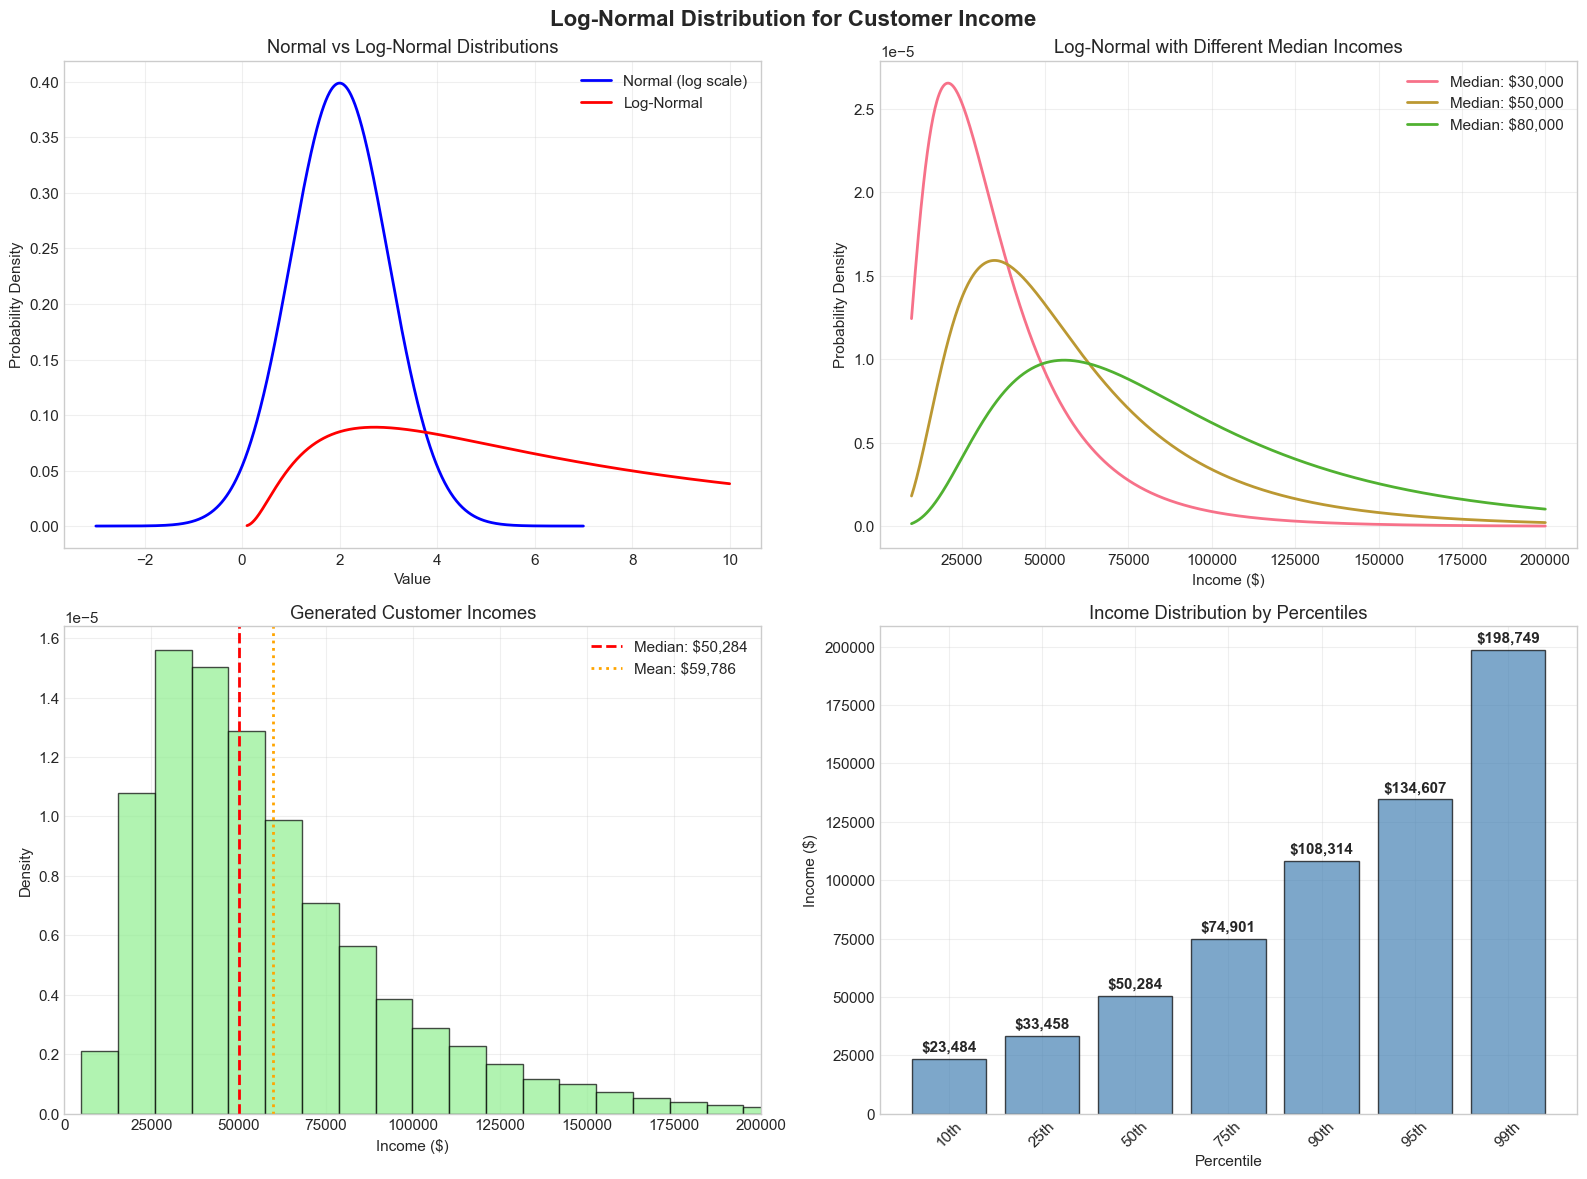

✅ Log-Normal Distribution Characteristics:
   • Right-skewed: Mean ($59,786) > Median ($50,284)
   • Top 10% earn more than $108,314
   • Bottom 25% earn less than $33,458
   • Realistic income inequality representation


In [4]:
# Log-Normal Distribution Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Log-Normal Distribution for Customer Income', fontsize=16, fontweight='bold')

# 1. Normal vs Log-Normal comparison
x_normal = np.linspace(-3, 7, 1000)
x_lognormal = np.linspace(0.1, 10, 1000)

axes[0,0].plot(x_normal, stats.norm.pdf(x_normal, 2, 1), 'b-', label='Normal (log scale)', linewidth=2)
axes[0,0].plot(x_lognormal, stats.lognorm.pdf(x_lognormal, s=1, scale=np.exp(2)), 'r-', label='Log-Normal', linewidth=2)
axes[0,0].set_title('Normal vs Log-Normal Distributions')
axes[0,0].set_xlabel('Value')
axes[0,0].set_ylabel('Probability Density')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Different Log-Normal parameters
mu_values = [np.log(30000), np.log(50000), np.log(80000)]
sigma = 0.6
x_income = np.linspace(10000, 200000, 1000)

for i, mu in enumerate(mu_values):
    median_income = np.exp(mu)
    pdf_values = stats.lognorm.pdf(x_income, s=sigma, scale=np.exp(mu))
    axes[0,1].plot(x_income, pdf_values, linewidth=2, 
                   label=f'Median: ${median_income:,.0f}')

axes[0,1].set_title('Log-Normal with Different Median Incomes')
axes[0,1].set_xlabel('Income ($)')
axes[0,1].set_ylabel('Probability Density')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].ticklabel_format(style='plain', axis='x')

# 3. Generate realistic income data
mu_income = np.log(50000)  # Log of median income
sigma_income = 0.6
incomes = stats.lognorm.rvs(s=sigma_income, scale=np.exp(mu_income), size=10000)

axes[1,0].hist(incomes, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].axvline(np.median(incomes), color='red', linestyle='--', linewidth=2, 
                  label=f'Median: ${np.median(incomes):,.0f}')
axes[1,0].axvline(np.mean(incomes), color='orange', linestyle=':', linewidth=2, 
                  label=f'Mean: ${np.mean(incomes):,.0f}')
axes[1,0].set_title('Generated Customer Incomes')
axes[1,0].set_xlabel('Income ($)')
axes[1,0].set_ylabel('Density')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xlim(0, 200000)

# 4. Income percentiles (realistic distribution)
income_percentiles = np.percentile(incomes, [10, 25, 50, 75, 90, 95, 99])
percentile_labels = ['10th', '25th', '50th', '75th', '90th', '95th', '99th']

axes[1,1].bar(range(len(income_percentiles)), income_percentiles, 
              color='steelblue', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Income Distribution by Percentiles')
axes[1,1].set_xlabel('Percentile')
axes[1,1].set_ylabel('Income ($)')
axes[1,1].set_xticks(range(len(percentile_labels)))
axes[1,1].set_xticklabels(percentile_labels, rotation=45)
axes[1,1].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(income_percentiles):
    axes[1,1].text(i, v + 2000, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Log-Normal Distribution Characteristics:")
print(f"   • Right-skewed: Mean (${np.mean(incomes):,.0f}) > Median (${np.median(incomes):,.0f})")
print(f"   • Top 10% earn more than ${income_percentiles[-3]:,.0f}")
print(f"   • Bottom 25% earn less than ${income_percentiles[1]:,.0f}")
print(f"   • Realistic income inequality representation")

In [5]:
# Implementation Code for Log-Normal Distribution
def generate_customer_incomes(n_customers, median_income=50000, income_std_factor=0.6):
    """
    Generate realistic customer incomes using log-normal distribution
    
    Parameters:
    - n_customers: number of incomes to generate
    - median_income: middle income value
    - income_std_factor: controls spread (higher = more inequality)
    """
    mu = np.log(median_income)
    sigma = income_std_factor
    
    incomes = stats.lognorm.rvs(s=sigma, scale=np.exp(mu), size=n_customers)
    return np.round(incomes).astype(int)

# Example usage
sample_incomes = generate_customer_incomes(1000)
print("🎯 Generated Sample Incomes:")
print(f"Sample: ${sample_incomes[:5]}")
print(f"Median: ${np.median(sample_incomes):,.0f}, Mean: ${np.mean(sample_incomes):,.0f}")
print(f"Range: ${sample_incomes.min():,.0f} - ${sample_incomes.max():,.0f}")

# Show income distribution
income_summary = pd.Series(sample_incomes).describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
print("\n📊 Income Distribution Summary:")
for stat, value in income_summary.items():
    print(f"   {stat}: ${value:,.0f}")

🎯 Generated Sample Incomes:
Sample: $[44599 24498 93109 61814 46546]
Median: $49,402, Mean: $59,268
Range: $7,993 - $332,749

📊 Income Distribution Summary:
   count: $1,000
   mean: $59,268
   std: $39,266
   min: $7,993
   10%: $23,036
   25%: $31,394
   50%: $49,402
   75%: $75,772
   90%: $104,229
   95%: $137,399
   max: $332,749


---
# 3. Beta Distribution (Scaled)
## Perfect for: Credit Scores & Satisfaction Scores

### Theory:
The **Beta distribution** is perfect for bounded data (0 to 1, then scaled). It's incredibly flexible and can model:
- Credit scores (300-850)
- Satisfaction ratings (1-10)
- Any percentage or probability

### Mathematical Properties:
- **Shape**: Extremely flexible (U-shaped, bell-shaped, skewed)
- **Parameters**: α (alpha), β (beta) shape parameters
- **Range**: 0 to 1 (then scaled to desired range)
- **Special cases**: Uniform when α=β=1

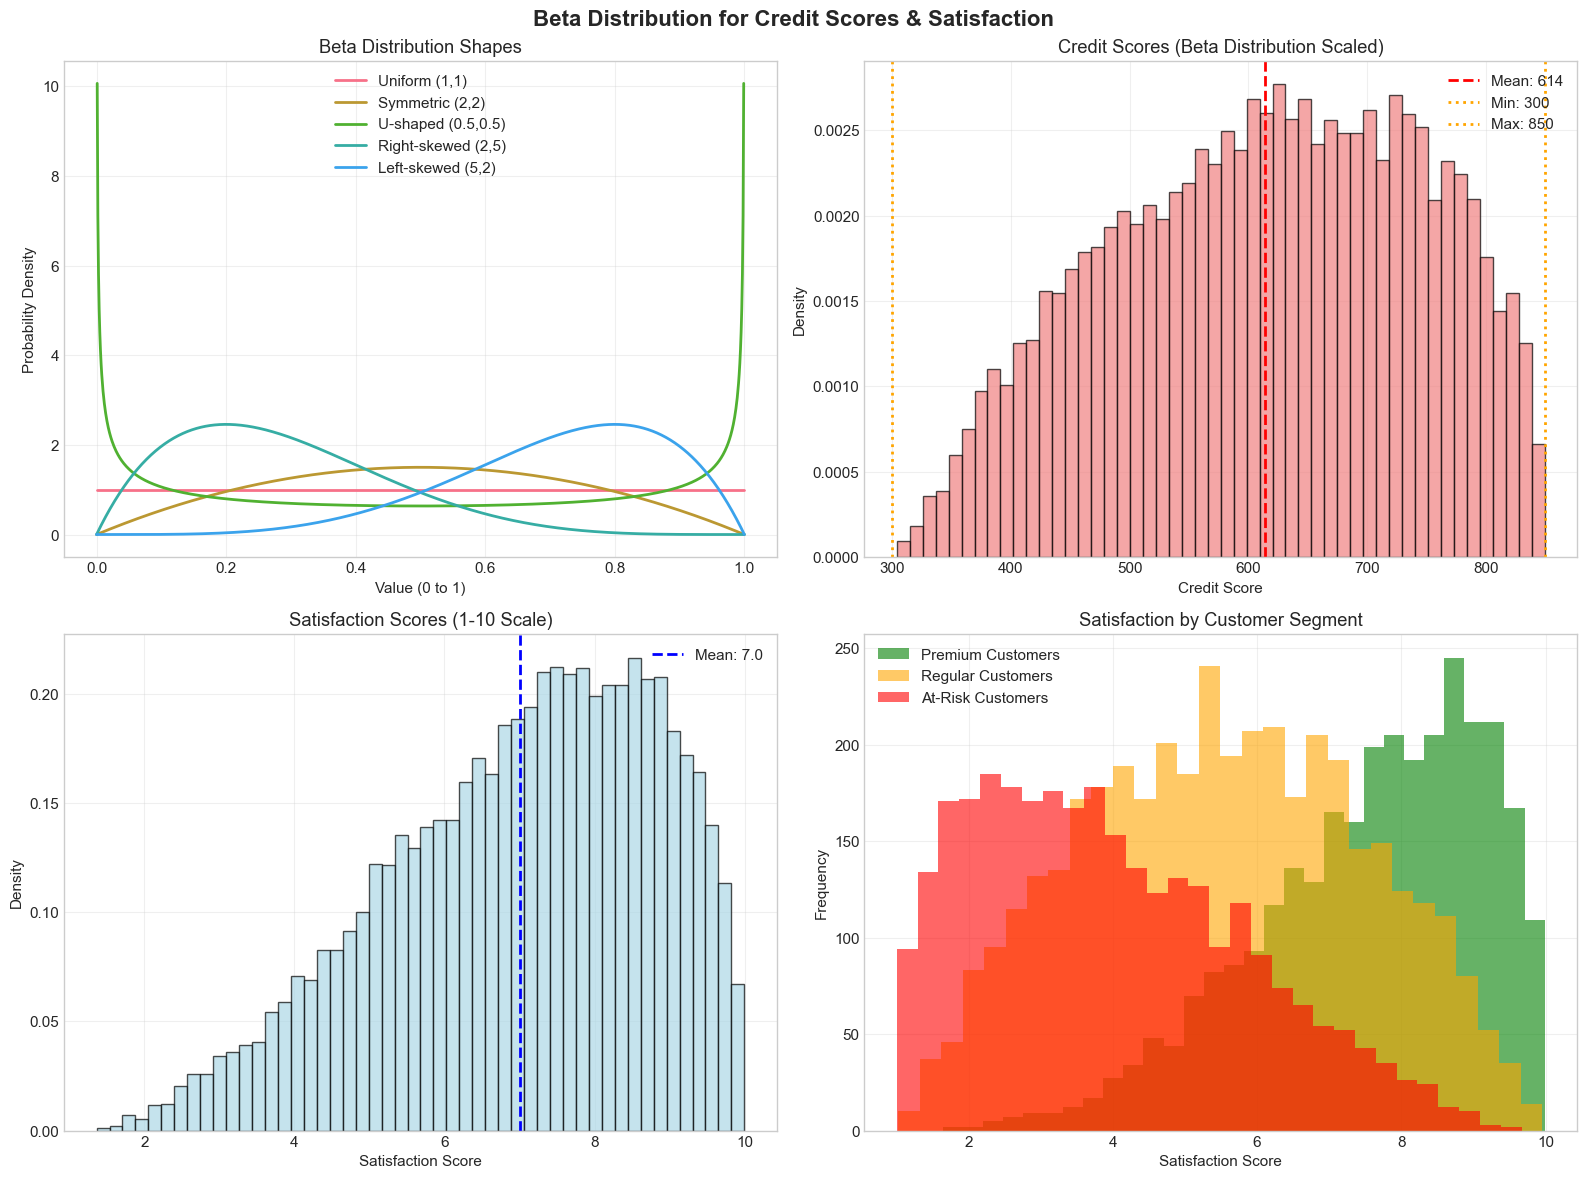

✅ Beta Distribution Characteristics:
   • Credit Scores: Mean 614, Range 300-850
   • Satisfaction: Mean 7.0, Range 1-10
   • Flexible shape: Can model any bounded distribution
   • Perfect for scores, ratings, and percentages


In [6]:
# Beta Distribution Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Beta Distribution for Credit Scores & Satisfaction', fontsize=16, fontweight='bold')

# 1. Different Beta shapes
x = np.linspace(0, 1, 1000)
beta_params = [(1, 1), (2, 2), (0.5, 0.5), (2, 5), (5, 2)]
beta_labels = ['Uniform (1,1)', 'Symmetric (2,2)', 'U-shaped (0.5,0.5)', 
               'Right-skewed (2,5)', 'Left-skewed (5,2)']

for (alpha, beta_param), label in zip(beta_params, beta_labels):
    y = stats.beta.pdf(x, alpha, beta_param)
    axes[0,0].plot(x, y, linewidth=2, label=label)

axes[0,0].set_title('Beta Distribution Shapes')
axes[0,0].set_xlabel('Value (0 to 1)')
axes[0,0].set_ylabel('Probability Density')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Credit Scores using Beta distribution
# Credit scores: 300-850, slightly skewed toward higher scores
alpha_credit, beta_credit = 2, 1.5
credit_raw = stats.beta.rvs(alpha_credit, beta_credit, size=10000)
credit_scores = 300 + credit_raw * 550  # Scale to 300-850 range

axes[0,1].hist(credit_scores, bins=50, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].axvline(np.mean(credit_scores), color='red', linestyle='--', linewidth=2, 
                  label=f'Mean: {np.mean(credit_scores):.0f}')
axes[0,1].axvline(300, color='orange', linestyle=':', linewidth=2, label='Min: 300')
axes[0,1].axvline(850, color='orange', linestyle=':', linewidth=2, label='Max: 850')
axes[0,1].set_title('Credit Scores (Beta Distribution Scaled)')
axes[0,1].set_xlabel('Credit Score')
axes[0,1].set_ylabel('Density')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Satisfaction Scores using Beta distribution
# Satisfaction: 1-10, skewed toward higher satisfaction
alpha_sat, beta_sat = 3, 1.5
satisfaction_raw = stats.beta.rvs(alpha_sat, beta_sat, size=10000)
satisfaction_scores = 1 + satisfaction_raw * 9  # Scale to 1-10 range

axes[1,0].hist(satisfaction_scores, bins=50, density=True, alpha=0.7, color='lightblue', edgecolor='black')
axes[1,0].axvline(np.mean(satisfaction_scores), color='blue', linestyle='--', linewidth=2, 
                  label=f'Mean: {np.mean(satisfaction_scores):.1f}')
axes[1,0].set_title('Satisfaction Scores (1-10 Scale)')
axes[1,0].set_xlabel('Satisfaction Score')
axes[1,0].set_ylabel('Density')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Comparing different satisfaction patterns
# Different customer segments with different satisfaction patterns
high_satisfaction = stats.beta.rvs(4, 1.5, size=3000)  # Premium customers
medium_satisfaction = stats.beta.rvs(2, 2, size=4000)   # Regular customers
low_satisfaction = stats.beta.rvs(1.5, 3, size=3000)   # Problematic customers

# Scale all to 1-10
high_sat_scaled = 1 + high_satisfaction * 9
medium_sat_scaled = 1 + medium_satisfaction * 9
low_sat_scaled = 1 + low_satisfaction * 9

axes[1,1].hist(high_sat_scaled, bins=30, alpha=0.6, label='Premium Customers', color='green')
axes[1,1].hist(medium_sat_scaled, bins=30, alpha=0.6, label='Regular Customers', color='orange')
axes[1,1].hist(low_sat_scaled, bins=30, alpha=0.6, label='At-Risk Customers', color='red')
axes[1,1].set_title('Satisfaction by Customer Segment')
axes[1,1].set_xlabel('Satisfaction Score')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Beta Distribution Characteristics:")
print(f"   • Credit Scores: Mean {np.mean(credit_scores):.0f}, Range 300-850")
print(f"   • Satisfaction: Mean {np.mean(satisfaction_scores):.1f}, Range 1-10")
print(f"   • Flexible shape: Can model any bounded distribution")
print(f"   • Perfect for scores, ratings, and percentages")

In [7]:
# Implementation Code for Beta Distribution
def generate_credit_scores(n_customers, alpha=2, beta=1.5):
    """
    Generate credit scores using Beta distribution scaled to 300-850
    
    Parameters:
    - n_customers: number of scores to generate
    - alpha, beta: shape parameters (alpha > beta for higher scores)
    """
    raw_scores = stats.beta.rvs(alpha, beta, size=n_customers)
    credit_scores = 300 + raw_scores * 550
    return np.round(credit_scores).astype(int)

def generate_satisfaction_scores(n_customers, alpha=3, beta=1.5):
    """
    Generate satisfaction scores using Beta distribution scaled to 1-10
    
    Parameters:
    - n_customers: number of scores to generate
    - alpha, beta: shape parameters (alpha > beta for higher satisfaction)
    """
    raw_scores = stats.beta.rvs(alpha, beta, size=n_customers)
    satisfaction_scores = 1 + raw_scores * 9
    return np.round(satisfaction_scores, 1)

# Example usage
sample_credit = generate_credit_scores(1000)
sample_satisfaction = generate_satisfaction_scores(1000)

print("🎯 Generated Sample Credit Scores:")
print(f"Sample: {sample_credit[:10]}")
print(f"Mean: {sample_credit.mean():.0f}, Range: {sample_credit.min()}-{sample_credit.max()}")

print("\n🎯 Generated Sample Satisfaction Scores:")
print(f"Sample: {sample_satisfaction[:10]}")
print(f"Mean: {sample_satisfaction.mean():.1f}, Range: {sample_satisfaction.min()}-{sample_satisfaction.max()}")

# Show score distributions
print("\n📊 Credit Score Ranges:")
credit_ranges = ['Poor (300-579)', 'Fair (580-669)', 'Good (670-739)', 'Very Good (740-799)', 'Excellent (800-850)']
range_counts = [
    sum((sample_credit >= 300) & (sample_credit <= 579)),
    sum((sample_credit >= 580) & (sample_credit <= 669)),
    sum((sample_credit >= 670) & (sample_credit <= 739)),
    sum((sample_credit >= 740) & (sample_credit <= 799)),
    sum((sample_credit >= 800) & (sample_credit <= 850))
]

for range_name, count in zip(credit_ranges, range_counts):
    percentage = count / len(sample_credit) * 100
    print(f"   {range_name}: {count} customers ({percentage:.1f}%)")

🎯 Generated Sample Credit Scores:
Sample: [451 719 708 729 445 664 777 764 398 608]
Mean: 612, Range: 314-842

🎯 Generated Sample Satisfaction Scores:
Sample: [4.5 7.6 7.9 6.6 7.8 9.1 9.2 7.6 4.8 7. ]
Mean: 7.0, Range: 1.7-9.9

📊 Credit Score Ranges:
   Poor (300-579): 397 customers (39.7%)
   Fair (580-669): 241 customers (24.1%)
   Good (670-739): 157 customers (15.7%)
   Very Good (740-799): 136 customers (13.6%)
   Excellent (800-850): 69 customers (6.9%)


---
# 4. Exponential Distribution
## Perfect for: Account Balances

### Theory:
The **Exponential distribution** models the time between events or quantities where:
- Many observations are small
- Few observations are large
- There's a constant "decay" rate

Perfect for account balances where most customers have small balances, few have large ones.

### Mathematical Properties:
- **Shape**: Decreasing exponential curve
- **Parameters**: λ (rate parameter) or scale = 1/λ
- **Range**: 0 to +∞
- **Mean = Variance**: Both equal to scale parameter

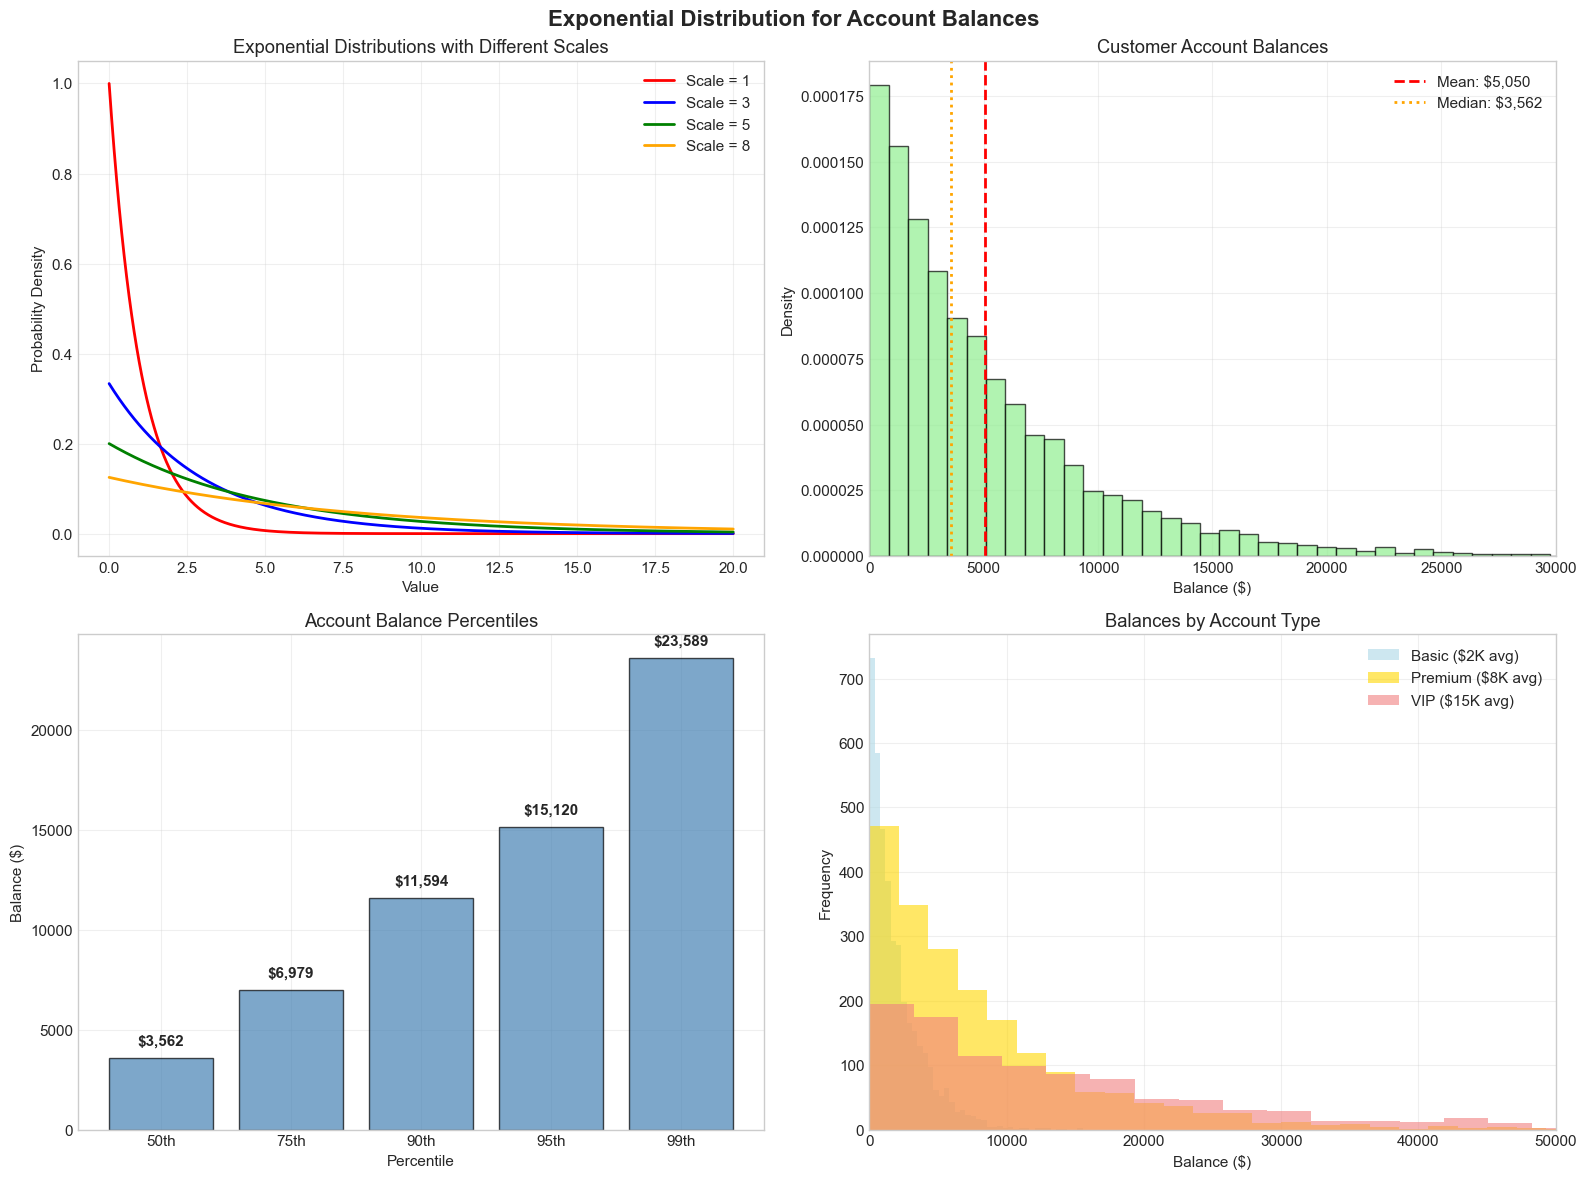

✅ Exponential Distribution Characteristics:
   • Most balances are small: 50% < $3,562
   • Mean > Median: $5,050 > $3,562
   • Top 1% have balances > $23,589
   • Perfect for modeling wealth distribution


In [8]:
# Exponential Distribution Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Exponential Distribution for Account Balances', fontsize=16, fontweight='bold')

# 1. Different exponential parameters
x = np.linspace(0, 20, 1000)
scales = [1, 3, 5, 8]
colors = ['red', 'blue', 'green', 'orange']

for scale, color in zip(scales, colors):
    y = stats.expon.pdf(x, scale=scale)
    axes[0,0].plot(x, y, color=color, linewidth=2, label=f'Scale = {scale}')

axes[0,0].set_title('Exponential Distributions with Different Scales')
axes[0,0].set_xlabel('Value')
axes[0,0].set_ylabel('Probability Density')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Account balances using exponential distribution
balance_scale = 5000  # Average balance
account_balances = stats.expon.rvs(scale=balance_scale, size=10000)

axes[0,1].hist(account_balances, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].axvline(np.mean(account_balances), color='red', linestyle='--', linewidth=2, 
                  label=f'Mean: ${np.mean(account_balances):,.0f}')
axes[0,1].axvline(np.median(account_balances), color='orange', linestyle=':', linewidth=2, 
                  label=f'Median: ${np.median(account_balances):,.0f}')
axes[0,1].set_title('Customer Account Balances')
axes[0,1].set_xlabel('Balance ($)')
axes[0,1].set_ylabel('Density')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xlim(0, 30000)

# 3. Balance distribution by percentiles
balance_percentiles = np.percentile(account_balances, [50, 75, 90, 95, 99])
percentile_labels = ['50th', '75th', '90th', '95th', '99th']

bars = axes[1,0].bar(range(len(balance_percentiles)), balance_percentiles, 
                     color='steelblue', alpha=0.7, edgecolor='black')
axes[1,0].set_title('Account Balance Percentiles')
axes[1,0].set_xlabel('Percentile')
axes[1,0].set_ylabel('Balance ($)')
axes[1,0].set_xticks(range(len(percentile_labels)))
axes[1,0].set_xticklabels(percentile_labels)
axes[1,0].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(balance_percentiles):
    axes[1,0].text(i, v + 500, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# 4. Compare different customer types
# Different account types with different average balances
basic_accounts = stats.expon.rvs(scale=2000, size=4000)    # Basic customers
premium_accounts = stats.expon.rvs(scale=8000, size=2000)  # Premium customers
vip_accounts = stats.expon.rvs(scale=15000, size=1000)     # VIP customers

axes[1,1].hist(basic_accounts, bins=40, alpha=0.6, label='Basic ($2K avg)', color='lightblue')
axes[1,1].hist(premium_accounts, bins=40, alpha=0.6, label='Premium ($8K avg)', color='gold')
axes[1,1].hist(vip_accounts, bins=40, alpha=0.6, label='VIP ($15K avg)', color='lightcoral')
axes[1,1].set_title('Balances by Account Type')
axes[1,1].set_xlabel('Balance ($)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xlim(0, 50000)

plt.tight_layout()
plt.show()

print("✅ Exponential Distribution Characteristics:")
print(f"   • Most balances are small: 50% < ${np.median(account_balances):,.0f}")
print(f"   • Mean > Median: ${np.mean(account_balances):,.0f} > ${np.median(account_balances):,.0f}")
print(f"   • Top 1% have balances > ${balance_percentiles[-1]:,.0f}")
print(f"   • Perfect for modeling wealth distribution")

In [9]:
# Implementation Code for Exponential Distribution
def generate_account_balances(n_customers, average_balance=5000):
    """
    Generate account balances using exponential distribution
    
    Parameters:
    - n_customers: number of balances to generate
    - average_balance: mean balance (scale parameter)
    """
    balances = stats.expon.rvs(scale=average_balance, size=n_customers)
    return np.round(balances, 2)

# Example usage
sample_balances = generate_account_balances(1000)
print("🎯 Generated Sample Account Balances:")
print(f"Sample: ${sample_balances[:10]}")
print(f"Mean: ${sample_balances.mean():,.2f}, Median: ${np.median(sample_balances):,.2f}")
print(f"Range: ${sample_balances.min():,.2f} - ${sample_balances.max():,.2f}")

# Balance categories
print("\n📊 Balance Distribution:")
balance_categories = [
    ('Low ($0-$1K)', sum(sample_balances <= 1000)),
    ('Medium ($1K-$5K)', sum((sample_balances > 1000) & (sample_balances <= 5000))),
    ('High ($5K-$15K)', sum((sample_balances > 5000) & (sample_balances <= 15000))),
    ('Very High (>$15K)', sum(sample_balances > 15000))
]

for category, count in balance_categories:
    percentage = count / len(sample_balances) * 100
    print(f"   {category}: {count} customers ({percentage:.1f}%)")

🎯 Generated Sample Account Balances:
Sample: $[4432.78   96.83 5317.55 4574.18 2337.32 2257.52  486.43   23.33  244.79
   59.98]
Mean: $4,791.54, Median: $3,376.02
Range: $7.81 - $45,230.65

📊 Balance Distribution:
   Low ($0-$1K): 205 customers (20.5%)
   Medium ($1K-$5K): 447 customers (44.7%)
   High ($5K-$15K): 308 customers (30.8%)
   Very High (>$15K): 40 customers (4.0%)


---
# 5. Poisson Distribution
## Perfect for: Number of Transactions

### Theory:
The **Poisson distribution** models the number of events occurring in a fixed time period when:
- Events occur independently
- Average rate is constant
- Events are rare relative to the time period

Perfect for monthly transaction counts, customer service calls, etc.

### Mathematical Properties:
- **Shape**: Discrete, right-skewed (approaches normal for large λ)
- **Parameters**: λ (lambda) - average rate
- **Range**: 0, 1, 2, 3, ... (non-negative integers)
- **Mean = Variance = λ**

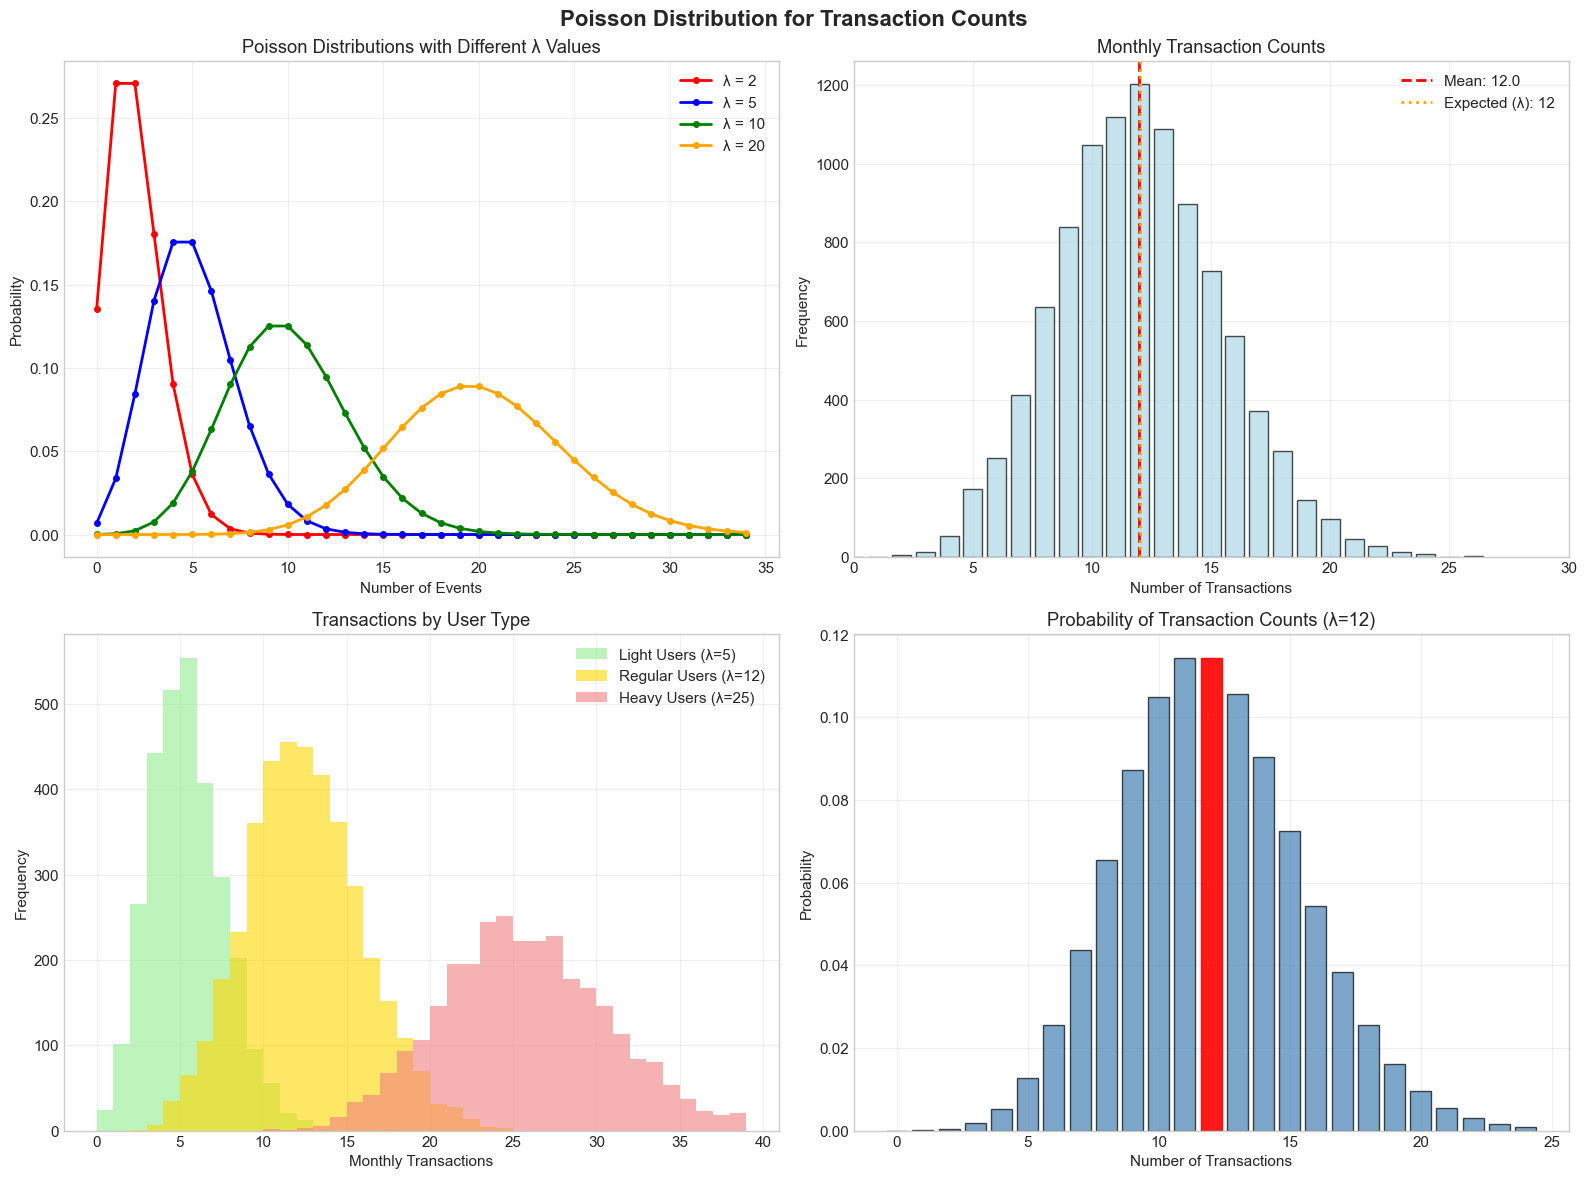

✅ Poisson Distribution Characteristics:
   • Discrete values: 2 to 26 transactions
   • Mean ≈ Variance: 12.0 ≈ 11.8
   • Most likely value: 12 transactions
   • Perfect for modeling event counts


In [10]:
# Poisson Distribution Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Poisson Distribution for Transaction Counts', fontsize=16, fontweight='bold')

# 1. Different Poisson parameters
lambdas = [2, 5, 10, 20]
colors = ['red', 'blue', 'green', 'orange']
x_max = 35

for lam, color in zip(lambdas, colors):
    x = np.arange(0, x_max)
    y = stats.poisson.pmf(x, lam)
    axes[0,0].plot(x, y, 'o-', color=color, linewidth=2, markersize=4, label=f'λ = {lam}')

axes[0,0].set_title('Poisson Distributions with Different λ Values')
axes[0,0].set_xlabel('Number of Events')
axes[0,0].set_ylabel('Probability')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Monthly transaction counts
lambda_transactions = 12  # Average 12 transactions per month
monthly_transactions = stats.poisson.rvs(lambda_transactions, size=10000)

transaction_counts = np.bincount(monthly_transactions)
x_trans = np.arange(len(transaction_counts))

axes[0,1].bar(x_trans, transaction_counts, alpha=0.7, color='lightblue', edgecolor='black')
axes[0,1].axvline(np.mean(monthly_transactions), color='red', linestyle='--', linewidth=2, 
                  label=f'Mean: {np.mean(monthly_transactions):.1f}')
axes[0,1].axvline(lambda_transactions, color='orange', linestyle=':', linewidth=2, 
                  label=f'Expected (λ): {lambda_transactions}')
axes[0,1].set_title('Monthly Transaction Counts')
axes[0,1].set_xlabel('Number of Transactions')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xlim(0, 30)

# 3. Different customer segments
# Different customer types with different transaction rates
light_users = stats.poisson.rvs(5, size=3000)   # Light users: 5 transactions/month
regular_users = stats.poisson.rvs(12, size=4000) # Regular users: 12 transactions/month
heavy_users = stats.poisson.rvs(25, size=3000)   # Heavy users: 25 transactions/month

axes[1,0].hist(light_users, bins=range(0, 40), alpha=0.6, label='Light Users (λ=5)', color='lightgreen')
axes[1,0].hist(regular_users, bins=range(0, 40), alpha=0.6, label='Regular Users (λ=12)', color='gold')
axes[1,0].hist(heavy_users, bins=range(0, 40), alpha=0.6, label='Heavy Users (λ=25)', color='lightcoral')
axes[1,0].set_title('Transactions by User Type')
axes[1,0].set_xlabel('Monthly Transactions')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Probability of specific transaction counts
target_transactions = np.arange(0, 25)
probabilities = stats.poisson.pmf(target_transactions, lambda_transactions)

bars = axes[1,1].bar(target_transactions, probabilities, alpha=0.7, color='steelblue', edgecolor='black')
axes[1,1].set_title(f'Probability of Transaction Counts (λ={lambda_transactions})')
axes[1,1].set_xlabel('Number of Transactions')
axes[1,1].set_ylabel('Probability')
axes[1,1].grid(True, alpha=0.3)

# Highlight most likely values
max_prob_idx = np.argmax(probabilities)
bars[max_prob_idx].set_color('red')
bars[max_prob_idx].set_alpha(0.9)

plt.tight_layout()
plt.show()

print("✅ Poisson Distribution Characteristics:")
print(f"   • Discrete values: {np.min(monthly_transactions)} to {np.max(monthly_transactions)} transactions")
print(f"   • Mean ≈ Variance: {np.mean(monthly_transactions):.1f} ≈ {np.var(monthly_transactions):.1f}")
print(f"   • Most likely value: {stats.mode(monthly_transactions)[0]} transactions")
print(f"   • Perfect for modeling event counts")

In [11]:
# Implementation Code for Poisson Distribution
def generate_transaction_counts(n_customers, average_transactions=12):
    """
    Generate monthly transaction counts using Poisson distribution
    
    Parameters:
    - n_customers: number of transaction counts to generate
    - average_transactions: lambda parameter (average rate)
    """
    transactions = stats.poisson.rvs(average_transactions, size=n_customers)
    return transactions

# Example usage
sample_transactions = generate_transaction_counts(1000)
print("🎯 Generated Sample Transaction Counts:")
print(f"Sample: {sample_transactions[:20]}")
print(f"Mean: {sample_transactions.mean():.1f}, Variance: {sample_transactions.var():.1f}")
print(f"Range: {sample_transactions.min()} - {sample_transactions.max()}")

# Transaction frequency analysis
print("\n📊 Transaction Distribution:")
unique_counts, frequencies = np.unique(sample_transactions, return_counts=True)
percentages = frequencies / len(sample_transactions) * 100

for count, freq, pct in zip(unique_counts[:10], frequencies[:10], percentages[:10]):
    print(f"   {count} transactions: {freq} customers ({pct:.1f}%)")

# Business insights
print("\n🔍 Business Insights:")
low_activity = sum(sample_transactions <= 5)
high_activity = sum(sample_transactions >= 20)
print(f"   • Low activity (≤5 trans): {low_activity} customers ({low_activity/len(sample_transactions)*100:.1f}%)")
print(f"   • High activity (≥20 trans): {high_activity} customers ({high_activity/len(sample_transactions)*100:.1f}%)")

🎯 Generated Sample Transaction Counts:
Sample: [21 11 15 26 15 13 16 16 11  8 12 11 11  9 15 16 13 15 10 11]
Mean: 12.1, Variance: 12.7
Range: 2 - 26

📊 Transaction Distribution:
   2 transactions: 2 customers (0.2%)
   3 transactions: 3 customers (0.3%)
   4 transactions: 5 customers (0.5%)
   5 transactions: 16 customers (1.6%)
   6 transactions: 25 customers (2.5%)
   7 transactions: 44 customers (4.4%)
   8 transactions: 63 customers (6.3%)
   9 transactions: 85 customers (8.5%)
   10 transactions: 87 customers (8.7%)
   11 transactions: 124 customers (12.4%)

🔍 Business Insights:
   • Low activity (≤5 trans): 26 customers (2.6%)
   • High activity (≥20 trans): 27 customers (2.7%)


---
# 6. Gamma Distribution
## Perfect for: Days Since Last Purchase & Monthly Spending

### Theory:
The **Gamma distribution** is perfect for modeling positive, right-skewed data like:
- Waiting times between events
- Spending amounts
- Duration data

It's more flexible than exponential and can model various shapes.

### Mathematical Properties:
- **Shape**: Positive, flexible shape (can be exponential-like or bell-shaped)
- **Parameters**: α (shape), β (rate) or scale = 1/β
- **Range**: 0 to +∞
- **Special case**: When α=1, becomes exponential distribution

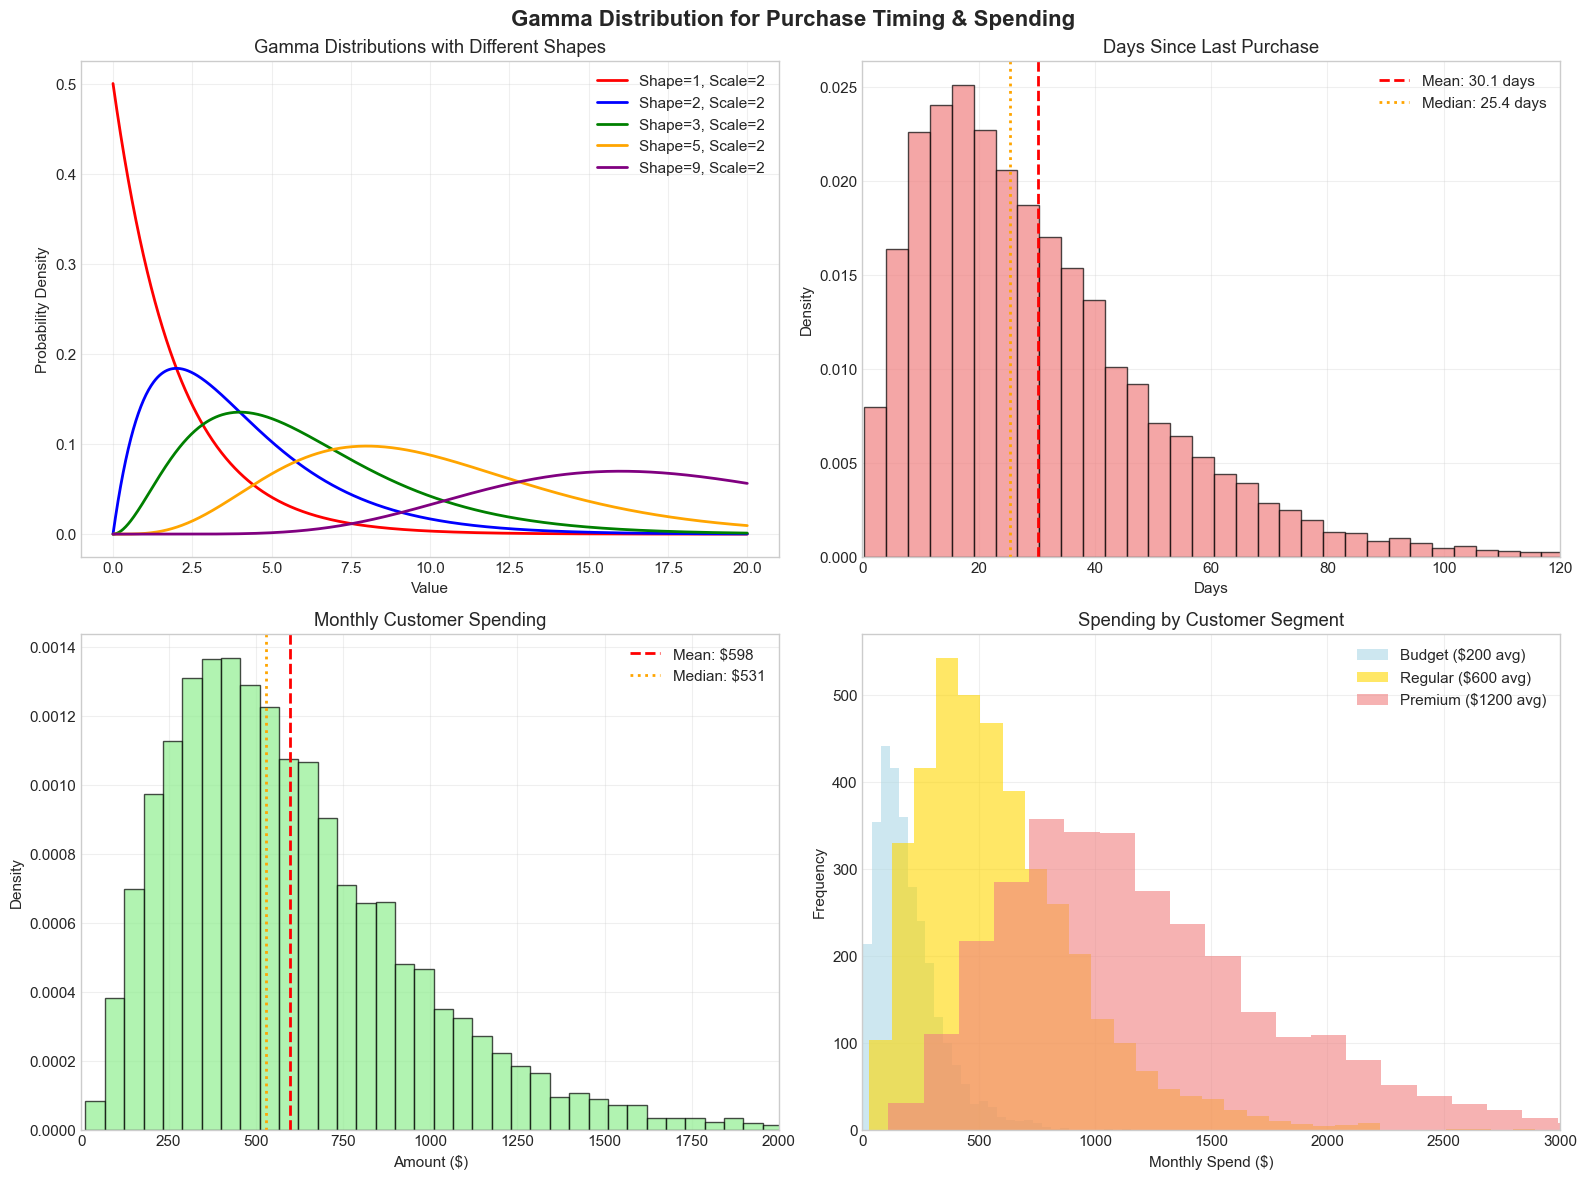

✅ Gamma Distribution Characteristics:
   • Purchase timing: Mean 30.1 days, right-skewed
   • Spending: Mean $598, flexible shape
   • Always positive values (perfect for amounts and durations)
   • More flexible than exponential distribution


In [12]:
# Gamma Distribution Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Gamma Distribution for Purchase Timing & Spending', fontsize=16, fontweight='bold')

# 1. Different Gamma shapes
x = np.linspace(0, 20, 1000)
gamma_params = [(1, 2), (2, 2), (3, 2), (5, 2), (9, 2)]
colors = ['red', 'blue', 'green', 'orange', 'purple']

for (shape, scale), color in zip(gamma_params, colors):
    y = stats.gamma.pdf(x, a=shape, scale=scale)
    axes[0,0].plot(x, y, color=color, linewidth=2, label=f'Shape={shape}, Scale={scale}')

axes[0,0].set_title('Gamma Distributions with Different Shapes')
axes[0,0].set_xlabel('Value')
axes[0,0].set_ylabel('Probability Density')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Days since last purchase
shape_days, scale_days = 2, 15  # Shape=2 gives moderate right skew
days_since_purchase = stats.gamma.rvs(a=shape_days, scale=scale_days, size=10000)

axes[0,1].hist(days_since_purchase, bins=50, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].axvline(np.mean(days_since_purchase), color='red', linestyle='--', linewidth=2, 
                  label=f'Mean: {np.mean(days_since_purchase):.1f} days')
axes[0,1].axvline(np.median(days_since_purchase), color='orange', linestyle=':', linewidth=2, 
                  label=f'Median: {np.median(days_since_purchase):.1f} days')
axes[0,1].set_title('Days Since Last Purchase')
axes[0,1].set_xlabel('Days')
axes[0,1].set_ylabel('Density')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xlim(0, 120)

# 3. Monthly spending amounts
shape_spend, scale_spend = 3, 200  # Shape=3 for moderate skew, scale=200 for $600 average
monthly_spend = stats.gamma.rvs(a=shape_spend, scale=scale_spend, size=10000)

axes[1,0].hist(monthly_spend, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].axvline(np.mean(monthly_spend), color='red', linestyle='--', linewidth=2, 
                  label=f'Mean: ${np.mean(monthly_spend):.0f}')
axes[1,0].axvline(np.median(monthly_spend), color='orange', linestyle=':', linewidth=2, 
                  label=f'Median: ${np.median(monthly_spend):.0f}')
axes[1,0].set_title('Monthly Customer Spending')
axes[1,0].set_xlabel('Amount ($)')
axes[1,0].set_ylabel('Density')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xlim(0, 2000)

# 4. Customer segments with different spending patterns
budget_customers = stats.gamma.rvs(a=2, scale=100, size=3000)    # Budget: $200 avg
regular_customers = stats.gamma.rvs(a=3, scale=200, size=4000)   # Regular: $600 avg
premium_customers = stats.gamma.rvs(a=4, scale=300, size=3000)   # Premium: $1200 avg

axes[1,1].hist(budget_customers, bins=30, alpha=0.6, label='Budget ($200 avg)', color='lightblue')
axes[1,1].hist(regular_customers, bins=30, alpha=0.6, label='Regular ($600 avg)', color='gold')
axes[1,1].hist(premium_customers, bins=30, alpha=0.6, label='Premium ($1200 avg)', color='lightcoral')
axes[1,1].set_title('Spending by Customer Segment')
axes[1,1].set_xlabel('Monthly Spend ($)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xlim(0, 3000)

plt.tight_layout()
plt.show()

print("✅ Gamma Distribution Characteristics:")
print(f"   • Purchase timing: Mean {np.mean(days_since_purchase):.1f} days, right-skewed")
print(f"   • Spending: Mean ${np.mean(monthly_spend):.0f}, flexible shape")
print(f"   • Always positive values (perfect for amounts and durations)")
print(f"   • More flexible than exponential distribution")

In [13]:
# Implementation Code for Gamma Distribution
def generate_days_since_purchase(n_customers, shape=2, scale=15):
    """
    Generate days since last purchase using Gamma distribution
    
    Parameters:
    - n_customers: number of values to generate
    - shape: shape parameter (controls skewness)
    - scale: scale parameter (controls spread)
    """
    days = stats.gamma.rvs(a=shape, scale=scale, size=n_customers)
    return np.round(days).astype(int)

def generate_monthly_spending(n_customers, shape=3, scale=200):
    """
    Generate monthly spending amounts using Gamma distribution
    
    Parameters:
    - n_customers: number of values to generate
    - shape: shape parameter (higher = less skewed)
    - scale: scale parameter (controls average spending)
    """
    spending = stats.gamma.rvs(a=shape, scale=scale, size=n_customers)
    return np.round(spending, 2)

# Example usage
sample_days = generate_days_since_purchase(1000)
sample_spending = generate_monthly_spending(1000)

print("🎯 Generated Sample Days Since Purchase:")
print(f"Sample: {sample_days[:10]}")
print(f"Mean: {sample_days.mean():.1f} days, Range: {sample_days.min()}-{sample_days.max()} days")

print("\n🎯 Generated Sample Monthly Spending:")
print(f"Sample: ${sample_spending[:10]}")
print(f"Mean: ${sample_spending.mean():.2f}, Range: ${sample_spending.min():.2f}-${sample_spending.max():.2f}")

# Purchase timing insights
print("\n📊 Purchase Timing Analysis:")
timing_categories = [
    ('Recent (0-7 days)', sum(sample_days <= 7)),
    ('This month (8-30 days)', sum((sample_days > 7) & (sample_days <= 30))),
    ('Long ago (31-90 days)', sum((sample_days > 30) & (sample_days <= 90))),
    ('Very long (>90 days)', sum(sample_days > 90))
]

for category, count in timing_categories:
    percentage = count / len(sample_days) * 100
    print(f"   {category}: {count} customers ({percentage:.1f}%)")

# Spending insights
print("\n📊 Spending Analysis:")
spending_categories = [
    ('Low (<$300)', sum(sample_spending < 300)),
    ('Medium ($300-$800)', sum((sample_spending >= 300) & (sample_spending < 800))),
    ('High ($800-$1500)', sum((sample_spending >= 800) & (sample_spending < 1500))),
    ('Very High (≥$1500)', sum(sample_spending >= 1500))
]

for category, count in spending_categories:
    percentage = count / len(sample_spending) * 100
    print(f"   {category}: {count} customers ({percentage:.1f}%)")

🎯 Generated Sample Days Since Purchase:
Sample: [ 4 20 14 43 49  7 12 20 23  9]
Mean: 31.0 days, Range: 0-188 days

🎯 Generated Sample Monthly Spending:
Sample: $[ 499.48 1899.99  805.48  569.61  267.47  482.77  385.28  170.36  821.83
 1273.17]
Mean: $576.72, Range: $45.00-$2838.75

📊 Purchase Timing Analysis:
   Recent (0-7 days): 82 customers (8.2%)
   This month (8-30 days): 500 customers (50.0%)
   Long ago (31-90 days): 397 customers (39.7%)
   Very long (>90 days): 21 customers (2.1%)

📊 Spending Analysis:
   Low (<$300): 205 customers (20.5%)
   Medium ($300-$800): 588 customers (58.8%)
   High ($800-$1500): 193 customers (19.3%)
   Very High (≥$1500): 14 customers (1.4%)


---
# Summary: Choosing the Right Distribution

## Quick Reference Guide

| **Data Type** | **Distribution** | **When to Use** | **Key Parameters** |
|---------------|------------------|-----------------|--------------------|
| **Bounded & Symmetric** | Normal (Truncated) | Age, height, test scores | μ (mean), σ (std), bounds |
| **Right-skewed, Positive** | Log-Normal | Income, prices, file sizes | μ (location), σ (scale) |
| **Bounded Flexible** | Beta (Scaled) | Ratings, scores, percentages | α, β (shape), scale range |
| **Heavy Right Tail** | Exponential | Account balances, wait times | λ (rate) or scale |
| **Count Data** | Poisson | Transactions, events, calls | λ (average rate) |
| **Positive, Flexible** | Gamma | Spending, durations, amounts | α (shape), β (scale) |
| **Survival/Lifetime** | Weibull | Customer lifetime, reliability | c (shape), scale |
| **Over-dispersed Counts** | Negative Binomial | Website visits, purchases | n, p (parameters) |

## Key Insights for Customer Data:

1. **Start with business understanding** - What does the data represent?
2. **Consider data bounds** - Positive only? Between 0-1? Fixed range?
3. **Think about shape** - Symmetric? Right-skewed? Bell-shaped?
4. **Validate with real data** - Compare generated vs actual distributions
5. **Use correlations** - Real customer attributes are related

### Next Steps:
- Combine these distributions to create complete customer profiles
- Add realistic correlations between variables
- Validate generated data against business rules
- Use statistical tests to verify distribution quality